In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from os import getcwd
import os

cwd = getcwd()
os.chdir("..")
data = pd.read_csv(getcwd() + "/data/updated_csv_filtered_FINAL.csv")

In [2]:
data.head(2)

,URL,All_Keywords,Title,Reason_For_Fund,Total_Raised,Total_Goal,Percent_Reached,Campaign_Date,Organizer,Beneficiary,...,Charity,Currency_Code,Donation_Count,Comments_Enabled,Donations_Enabled,Country,Is_Business,Is_Team,Campaign_Photo_URL,Description
0,https://www.gofundme.com/f/let-them-stay-home,['opiate'],Let them stay home,Accidents & Emergencies,4223.0,4000.0,1.06,"July 12, 2017",Eddie Crandall,NaN,...,NaN,USD,62.0,True,True,US,False,False,https://d2g8igdw686xgo.cloudfront.net/22210302...,"Hi, I'm not sure where to start, so please sit..."
1,https://www.gofundme.com/f/mark-richards-medic...,['opiate'],Mark Richards Medical Fund,"Medical, Illness & Healing",2545.0,1500.0,1.70,"February 15, 2017",Cat Spin,Mark Richards,...,NaN,USD,24.0,True,True,US,False,False,https://d2g8igdw686xgo.cloudfront.net/18252684...,"Hello Everyone! As most of you know, Mark has..."


## Correlation Analysis

In [3]:
corr_data = data[['Total_Raised', 'Total_Goal', 'Percent_Reached','Donors'
                    ,'Shares','Followers','Num_Updates', 'Num_Comments', 'Donation_Count']]

In [4]:
correlation = corr_data.corr()

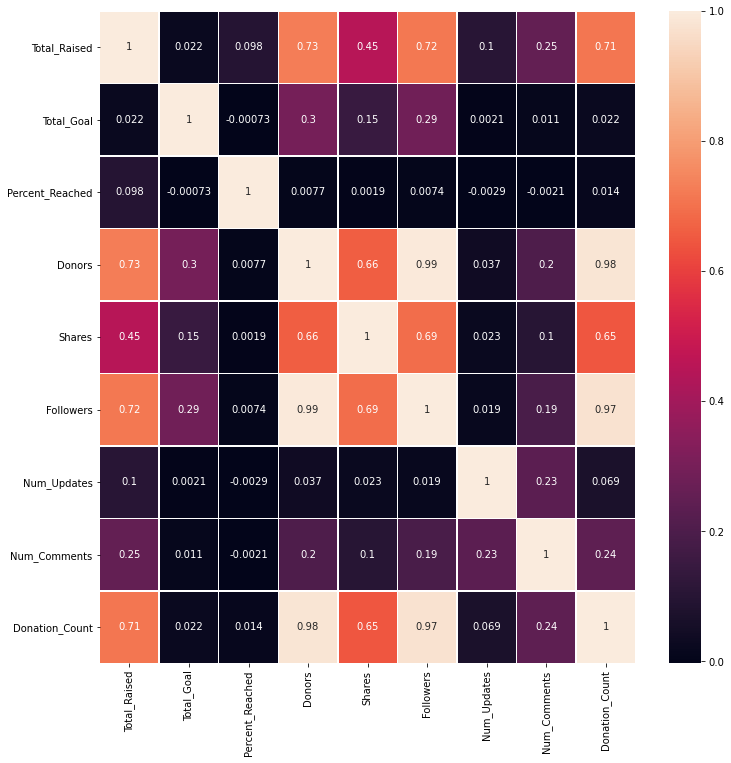

In [5]:
fig, ax = plt.subplots(figsize=(12,12))         # Sample figsize in inches
sns.heatmap(correlation, annot=True, linewidths=.5, ax=ax).get_figure().savefig("/Users/jaydenfont/Desktop/School/Classes/CS506/correlation_matrix.png")

### Observations <br>
Shares, donors, and donation count had strong positive correlations to the total amount raised by the campaign. The number of shares did as well, but to a much lesser extent. <br>
None of the above variables had a very strong correlation with the actual percent goal reached in either the positive or negative direction (implies that the engagement from other users may have not have had a massive effect on a campaigns success by that metric).<br>
Because some of the data is collinear, we can eventually use PCA to combine some of them.

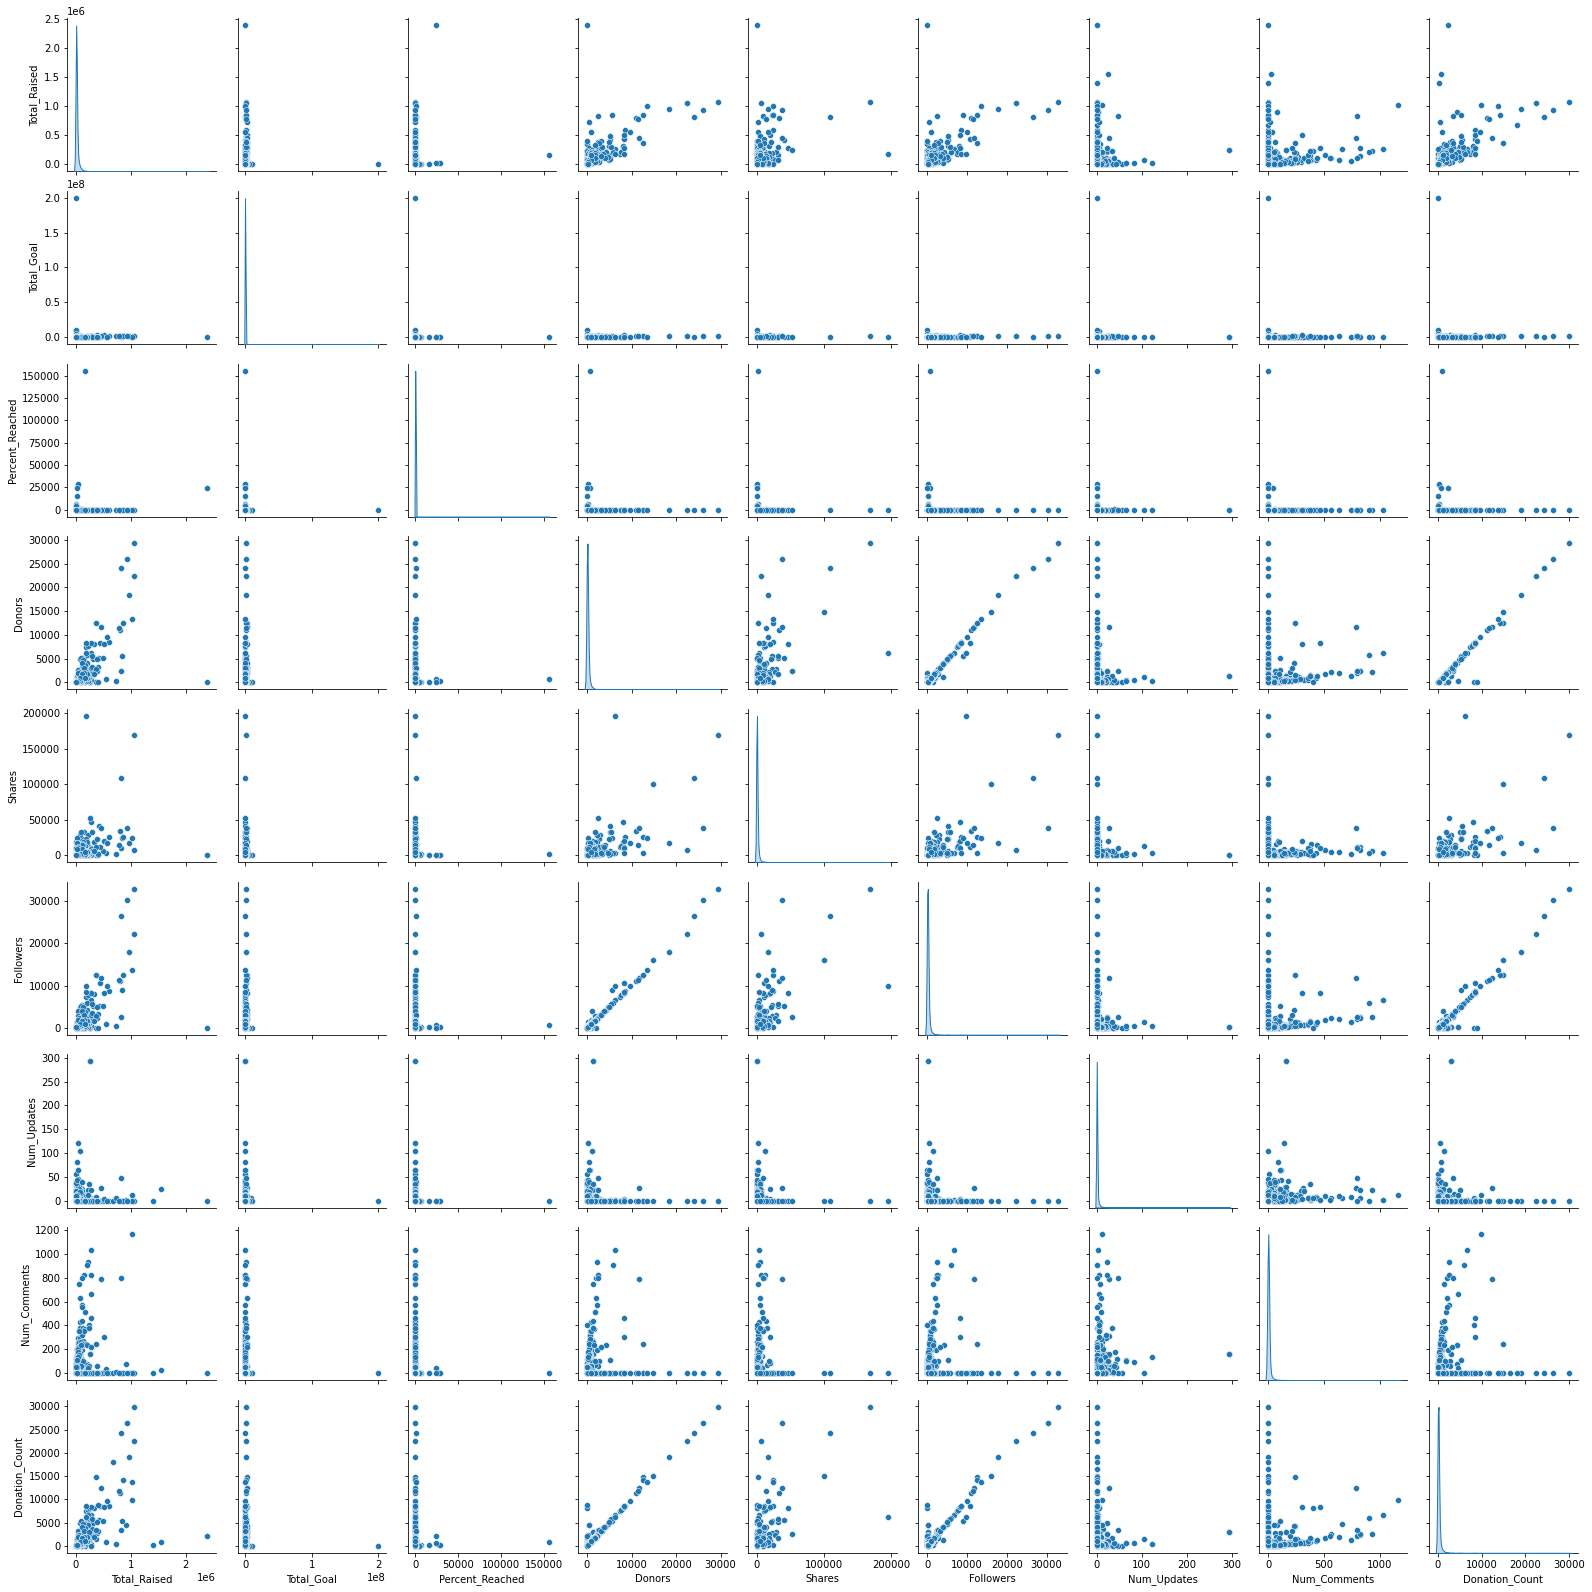

In [6]:
sns.pairplot(corr_data, diag_kind='kde') # .savefig("/Users/jaydenfont/Desktop/School/Classes/CS506/pairplot.png")

The pairplot shows much of the same information as the correlation matrix, except it also shows the distributions of each numerical feature

## For further analysis, this code will normalize the number of donors and shares

In [7]:
import scipy.stats
import numpy as np

donors_zscore = scipy.stats.zscore(data.Donors, nan_policy='omit')
donors_zscore

array([-0.16654512, -0.20644654, -0.16339501, ..., -0.08044206,
               nan,  0.8183899 ])

In [8]:
shares_zscore = scipy.stats.zscore(data.Shares, nan_policy='omit')
shares_zscore

array([-0.07679484, -0.23012962, -0.11731104, ..., -0.20192498,
               nan,  0.76665842])

In [9]:
df = pd.DataFrame(np.array([donors_zscore, shares_zscore]).T, columns = ['Donor_zscore', 'Shares_zscore'])
df

,Donor_zscore,Shares_zscore
0,-0.166545,-0.076795
1,-0.206447,-0.230130
2,-0.163395,-0.117311
3,0.533830,0.363735
4,-0.057341,0.005581
...,...,...
7565,0.044512,-0.189837
7566,-0.148694,-0.201701
7567,-0.080442,-0.201925
7568,NaN,NaN


In [10]:
data[['Donor_zscore', 'Shares_zscore']] = df
data.head(3)

,URL,All_Keywords,Title,Reason_For_Fund,Total_Raised,Total_Goal,Percent_Reached,Campaign_Date,Organizer,Beneficiary,...,Donation_Count,Comments_Enabled,Donations_Enabled,Country,Is_Business,Is_Team,Campaign_Photo_URL,Description,Donor_zscore,Shares_zscore
0,https://www.gofundme.com/f/let-them-stay-home,['opiate'],Let them stay home,Accidents & Emergencies,4223.0,4000.0,1.06,"July 12, 2017",Eddie Crandall,NaN,...,62.0,True,True,US,False,False,https://d2g8igdw686xgo.cloudfront.net/22210302...,"Hi, I'm not sure where to start, so please sit...",-0.166545,-0.076795
1,https://www.gofundme.com/f/mark-richards-medic...,['opiate'],Mark Richards Medical Fund,"Medical, Illness & Healing",2545.0,1500.0,1.70,"February 15, 2017",Cat Spin,Mark Richards,...,24.0,True,True,US,False,False,https://d2g8igdw686xgo.cloudfront.net/18252684...,"Hello Everyone! As most of you know, Mark has...",-0.206447,-0.230130
2,https://www.gofundme.com/f/jaynasdream,"['opiate', 'overdose', 'drugs', 'addiction']",Jayna’s Dream,Other,5350.0,7500.0,0.71,"July 14, 2018",Regina Contrino,NaN,...,75.0,True,True,US,False,False,https://d2g8igdw686xgo.cloudfront.net/_1575469...,My daughter was an aspiring model who had a dr...,-0.163395,-0.117311
